In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

In [2]:
# Read the CSV file into a DataFrame: df
stock = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
stock.head()

,companies,1/4/2010,1/5/2010,1/6/2010,1/7/2010,1/8/2010,1/11/2010,1/12/2010,1/13/2010,1/14/2010,...,10/16/2013,10/17/2013,10/18/2013,10/21/2013,10/22/2013,10/23/2013,10/24/2013,10/25/2013,10/28/2013,10/29/2013
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [3]:
movements=stock.iloc[:,1:].values
companies=stock.iloc[:,0].values

# Clustering stocks using KMeans

In [4]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Predict the cluster labels: labels
labels =pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': stock['companies'].values})

# Display df sorted by cluster label
print(df.sort_values('labels'))


                             companies  labels
56                            Wal-Mart       0
20                          Home Depot       1
39                              Pfizer       1
43                                 SAP       1
37                            Novartis       1
31                           McDonalds       1
30                          MasterCard       1
28                           Coca Cola       1
46                      Sanofi-Aventis       1
49                               Total       1
42                   Royal Dutch Shell       1
19                     GlaxoSmithKline       1
41                       Philip Morris       1
6             British American Tobacco       1
52                            Unilever       1
29                     Lookheed Martin       2
4                               Boeing       2
36                    Northrop Grumman       2
54                            Walgreen       2
14                                Dell       3
33           

<IPython.core.display.Javascript object>


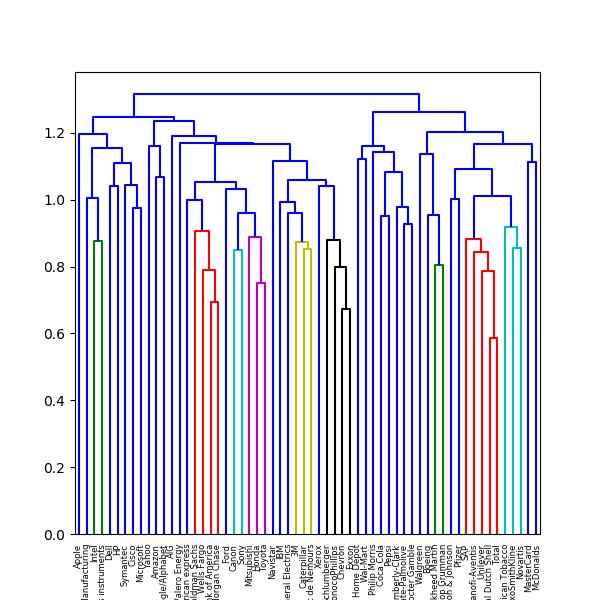

In [10]:
# Import normalize
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)
# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')
plt.figure(figsize = (6, 6))
# Plot the dendrogram
dendrogram(mergings,labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [6]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,1.2,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'companies': stock['companies'].values})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['companies'])

# Display ct
print(ct)

companies  3M  AIG  Amazon  American express  Apple  Bank of America  Boeing  \
labels                                                                         
1           0    0       0                 0      1                0       0   
2           0    0       1                 0      0                0       0   
3           1    1       0                 1      0                1       0   
4           0    0       0                 0      0                0       0   
5           0    0       0                 0      0                0       1   
6           0    0       0                 0      0                0       0   

companies  British American Tobacco  Canon  Caterpillar  ...    \
labels                                                   ...     
1                                 0      0            0  ...     
2                                 0      0            0  ...     
3                                 0      1            1  ...     
4                            

# A t-SNE map of the stock market

<IPython.core.display.Javascript object>


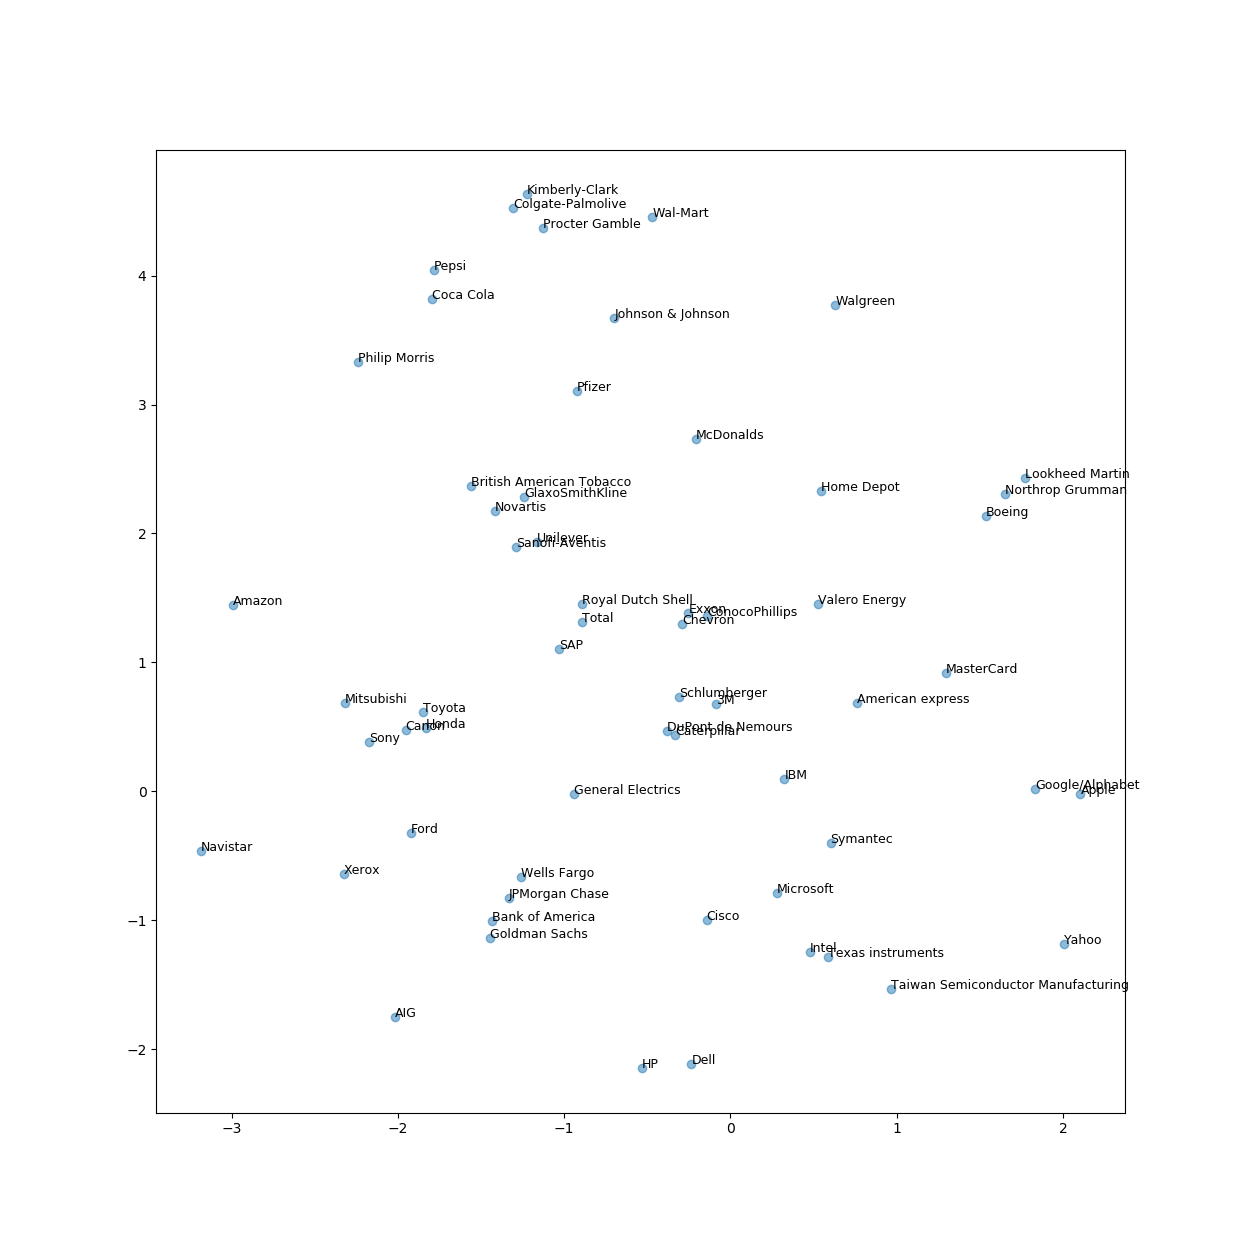

In [7]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize = (12.5, 12.5))
plt.scatter(xs, ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=9, alpha=1)
plt.show()